In [1]:
import pandas as pd

pd.set_option("mode.copy_on_write", True)

df = pd.read_excel("../src/emission_annual.xlsx")

In [2]:
df.head(10)

,Year,State,Producer Type,Energy Source,CO2\n(Metric Tons),SO2\n(Metric Tons),NOx\n(Metric Tons)
0,1990,AK,Commercial Cogen,All Sources,824004,13198,3011
1,1990,AK,Commercial Cogen,Coal,821929,13191,3009
2,1990,AK,Commercial Cogen,Petroleum,2075,6,2
3,1990,AK,Commercial Non-Cogen,All Sources,0,149,42
4,1990,AK,Commercial Non-Cogen,Petroleum,0,149,42
5,1990,AK,Electric Utility,All Sources,2814130,2403,7837
6,1990,AK,Electric Utility,Coal,646430,832,2881
7,1990,AK,Electric Utility,Natural Gas,1886585,9,4364
8,1990,AK,Electric Utility,Petroleum,281115,1562,592
9,1990,AK,Industrial Cogen,All Sources,176547,2968,791


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47674 entries, 0 to 47673
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               47674 non-null  int64 
 1   State              47674 non-null  object
 2   Producer Type      47674 non-null  object
 3   Energy Source      47674 non-null  object
 4   CO2
(Metric Tons)  47674 non-null  int64 
 5   SO2
(Metric Tons)  47674 non-null  int64 
 6   NOx
(Metric Tons)  47674 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 2.5+ MB


In [4]:
df["CO2_anual"] = df.groupby(["Year", "State"])["CO2\n(Metric Tons)"].transform("sum")

df.head(10)

,Year,State,Producer Type,Energy Source,CO2\n(Metric Tons),SO2\n(Metric Tons),NOx\n(Metric Tons),CO2_anual
0,1990,AK,Commercial Cogen,All Sources,824004,13198,3011,16835236
1,1990,AK,Commercial Cogen,Coal,821929,13191,3009,16835236
2,1990,AK,Commercial Cogen,Petroleum,2075,6,2,16835236
3,1990,AK,Commercial Non-Cogen,All Sources,0,149,42,16835236
4,1990,AK,Commercial Non-Cogen,Petroleum,0,149,42,16835236
5,1990,AK,Electric Utility,All Sources,2814130,2403,7837,16835236
6,1990,AK,Electric Utility,Coal,646430,832,2881,16835236
7,1990,AK,Electric Utility,Natural Gas,1886585,9,4364,16835236
8,1990,AK,Electric Utility,Petroleum,281115,1562,592,16835236
9,1990,AK,Industrial Cogen,All Sources,176547,2968,791,16835236


In [5]:
merged = df[["Year", "State", "CO2_anual"]].drop_duplicates()
merged.head(10)

,Year,State,CO2_anual
0,1990,AK,16835236
22,1990,AL,211744252
43,1990,AR,93703208
64,1990,AZ,132444852
84,1990,CA,210622572
121,1990,CO,126068340
143,1990,CT,48413072
166,1990,DC,1638896
170,1990,DE,35539516
184,1990,FL,366220948


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

Pre = list(range(2000, 2009))
Post = list(range(2010, 2019))

In [7]:
def plot_emission(merged, Pre, Post, treated, control):
    fig, ax = plt.subplots()

    sns.regplot(
        x="Year",
        y="CO2_anual",
        data=merged[(merged["Year"].isin(Pre) & (merged["State"] == treated))],
        ax=ax,
        scatter=False,
        color="orange",
        label=f"Treated {treated}",
    )

    sns.regplot(
        x="Year",
        y="CO2_anual",
        data=merged[(merged["Year"].isin(Pre) & (merged["State"] == control))],
        ax=ax,
        scatter=False,
        color="blue",
        label=f"Control {control}",
    )

    sns.regplot(
        x="Year",
        y="CO2_anual",
        data=merged[(merged["Year"].isin(Post) & (merged["State"] == treated))],
        ax=ax,
        scatter=False,
        color="orange",
    )

    sns.regplot(
        x="Year",
        y="CO2_anual",
        data=merged[(merged["Year"].isin(Post) & (merged["State"] == control))],
        ax=ax,
        scatter=False,
        color="blue",
    )

    ax.axvline(x=2009, color="r", linestyle="--", label="Policy Change")

    plt.xlabel("Year")
    plt.ylabel("CO2 annual emission (Metric Tons)")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.legend()
    plt.show()

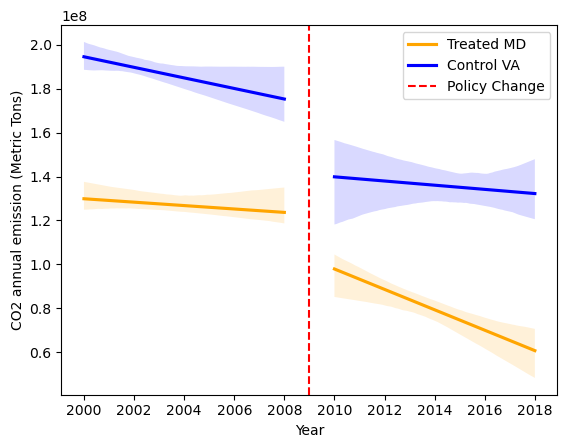

In [8]:
plot_emission(merged, Pre, Post, "MD", "VA")

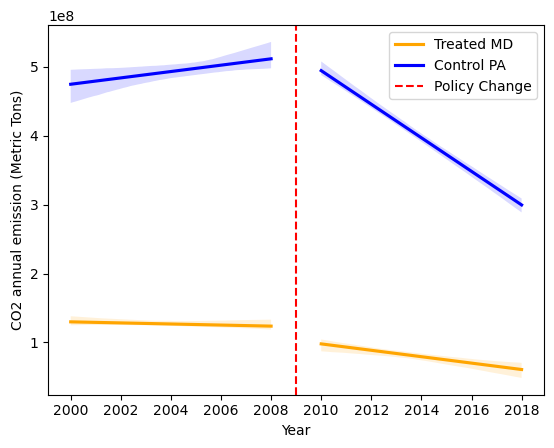

In [9]:
plot_emission(merged, Pre, Post, "MD", "PA")

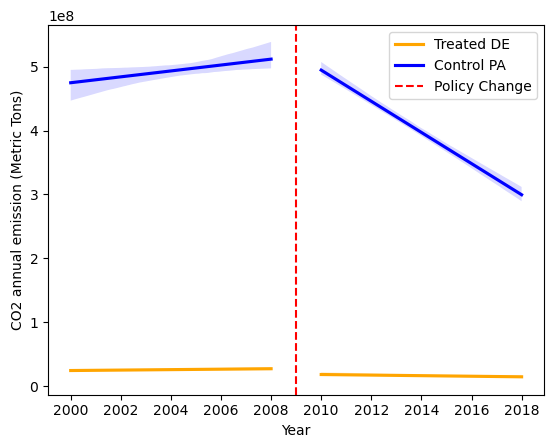

In [10]:
plot_emission(merged, Pre, Post, "DE", "PA")

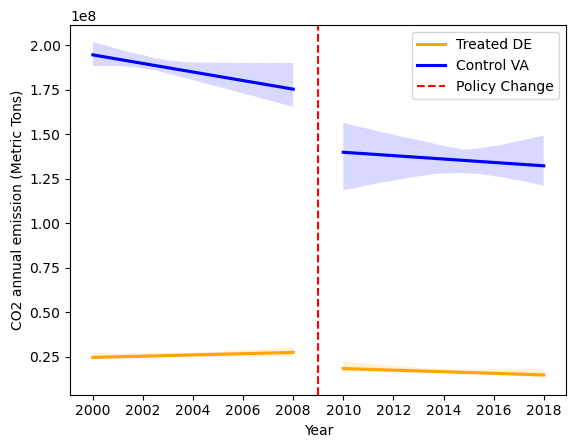

In [11]:
plot_emission(merged, Pre, Post, "DE", "VA")

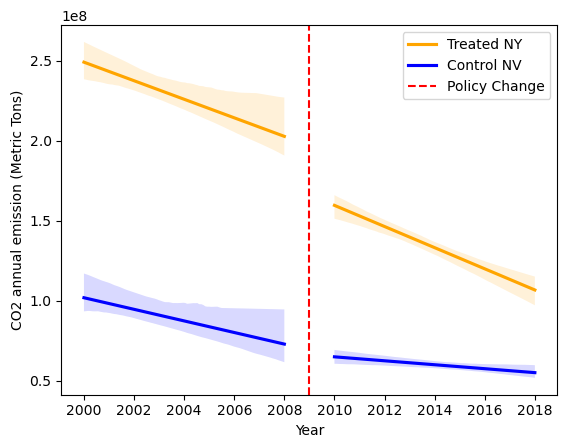

In [12]:
plot_emission(merged, Pre, Post, "NY", "NV")